<a href="https://colab.research.google.com/github/artursnik/AN_GA_AlgorithmCode/blob/main/V%C4%93rtspap%C4%ABru_darbs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quandl # instalējam biblotēku kura ļauj piekļūt vēsturiskajiem akciju datiem

In [ ]:
!pip install mplcyberpunk

In [5]:
import pandas as pd  #datu apstrādes un vizualizāciju bibliotēkas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco
import mplcyberpunk
import random

plt.style.use("cyberpunk")
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
quandl.ApiConfig.api_key = "D_3vZshaZ94k_WKgzrjg" # NASDAQ API key
stocks = ['AAPL','MSFT','GOOGL','AMZN','NVDA','META'] # Izvēlamies akciju tickerus kurus gribam redzēt
data = quandl.get_table('WIKI/PRICES', ticker = stocks,   # Daily adjusted closing price of each stock
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2012-1-1', 'lte': '2017-12-31' }, paginate=True) # Laika rāmis kurā vēlamies apskatīties akciju cenas
data.head(11000) # Norādam cik ierakstus gribam redzēt

,date,ticker,adj_close
None,,,
0,2017-12-29,NVDA,193.500000
1,2017-12-28,NVDA,197.400000
2,2017-12-27,NVDA,197.170000
3,2017-12-26,NVDA,197.440000
4,2017-12-22,NVDA,195.270000
...,...,...,...
7533,2012-01-09,AAPL,54.198183
7534,2012-01-06,AAPL,54.284287
7535,2012-01-05,AAPL,53.722681


In [8]:
'''
all_tickers = data['ticker'].unique()
selected_tickers = random.sample(list(all_tickers), 4) # izvēlamies random tikerus no mūsusu akciju seta
num_portfolios = 3  # sadalam trīs portfeļos
portfolios = [selected_tickers[i:i + num_portfolios] for i in range(0, len(selected_tickers), num_portfolios)]
'''

In [9]:
data.info() # informaācija par datu formātiem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7538 entries, 0 to 7537
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       7538 non-null   datetime64[ns]
 1   ticker     7538 non-null   object        
 2   adj_close  7538 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 176.8+ KB


In [10]:
df = data.set_index('date')
df.head(11000)

,ticker,adj_close
date,,
2017-12-29,NVDA,193.500000
2017-12-28,NVDA,197.400000
2017-12-27,NVDA,197.170000
2017-12-26,NVDA,197.440000
2017-12-22,NVDA,195.270000
...,...,...
2012-01-09,AAPL,54.198183
2012-01-06,AAPL,54.284287
2012-01-05,AAPL,53.722681


In [ ]:
'''
def display_portfolios(portfolios, mean_returns, cov_matrix, risk_free_rate):
    for i, portfolio_tickers in enumerate(portfolios, 1):
        returns = calculate_portfolio_returns(portfolio_tickers, mean_returns)
        weights = calculate_portfolio_weights(portfolio_tickers)

        sdp, rp = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        an_vol = np.std(returns) * np.sqrt(252)
        an_rt = np.sum(mean_returns * weights) * 252

        plt.scatter(an_vol, an_rt, marker='o', s=300, label=f'Portfolio {i}')
    for ticker in all_tickers:
        returns = data[data['ticker'] == ticker]['adj_close'].pct_change()
        an_vol = np.std(returns) * np.sqrt(252)
        an_rt = np.mean(returns) * 252

        plt.scatter(an_vol, an_rt, marker='^', s=200, label=ticker)

    plt.title('Portfolio Optimization with Portfolios and Individual Stocks')
    plt.xlabel('Annualized Volatility')
    plt.ylabel('Annualized Returns')
    plt.legend(labelspacing=0.8)
    plt.show()
# tālāk jāiet funkcijām ar kurām ploto datus beigās
'''

In [11]:
table = df.pivot(columns='ticker')
table.columns = [col[1] for col in table.columns] # Norādot kolonnu [1] zemāk sarakstā var atlasīt akciju nosaukumus daudzlīmeņu kolonnā
table.head(100)

,AAPL,AMZN,GOOGL,MSFT,NVDA
date,,,,,
2012-01-03,52.848787,179.03,333.735209,22.792249,13.027711
2012-01-04,53.132802,177.51,335.174652,23.332995,13.176175
2012-01-05,53.722681,177.61,330.525300,23.571435,13.649404
2012-01-06,54.284287,182.61,326.016381,23.933352,13.491661
2012-01-09,54.198183,178.56,312.193712,23.622529,13.491661
...,...,...,...,...,...
2012-05-18,68.161222,213.85,301.129558,25.256331,11.209028
2012-05-21,72.132303,218.11,308.005784,25.670511,11.403887
2012-05-22,71.578408,215.33,301.330177,25.679140,11.264702


Text(0, 0.5, 'Cena $')

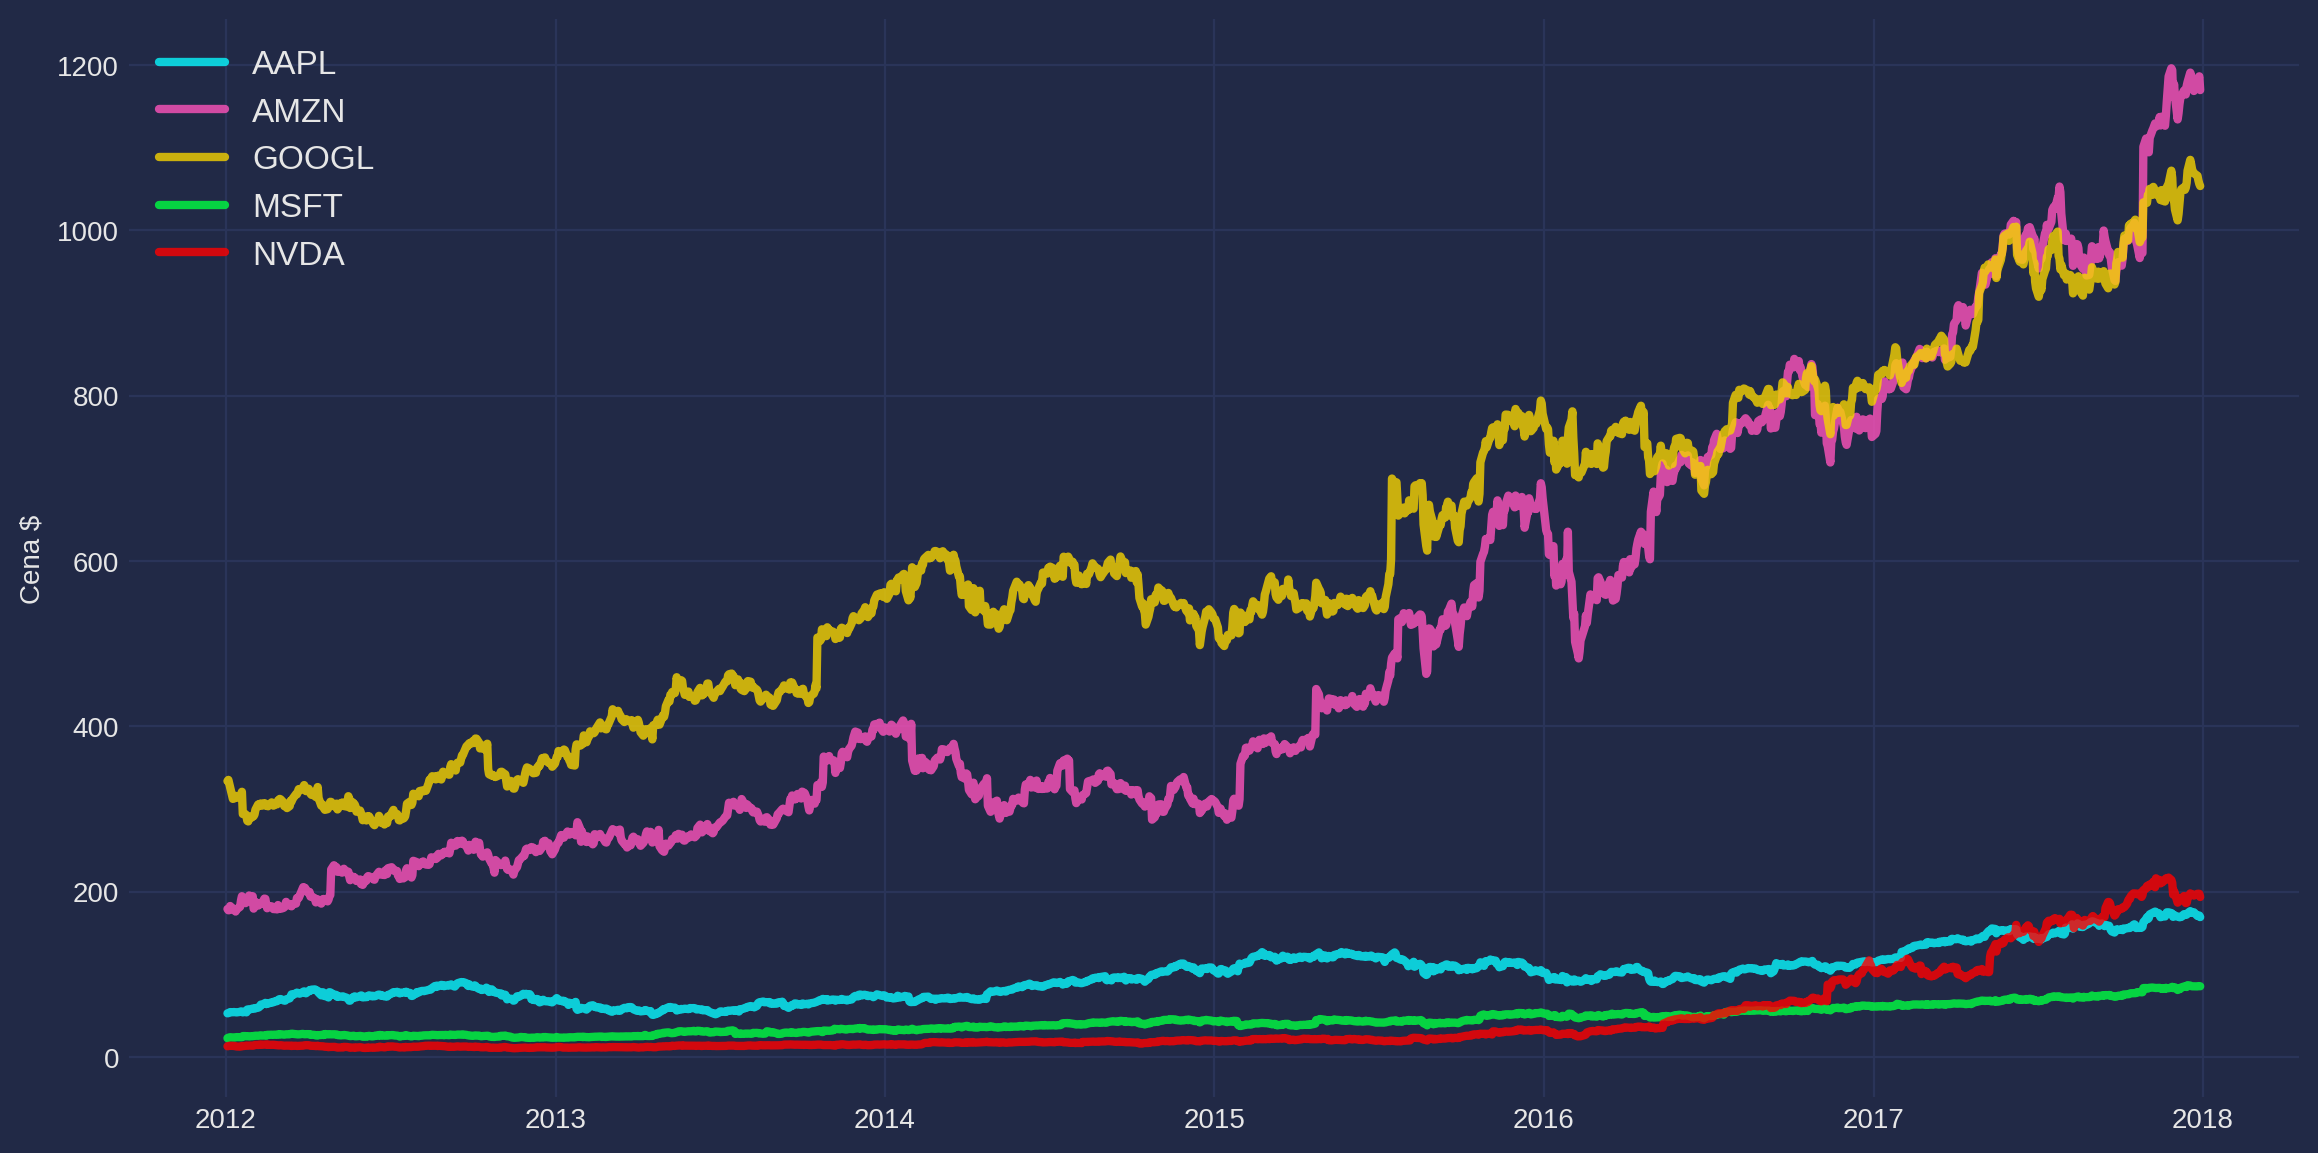

In [12]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)  # tiek izveidota tabula kura parāda mūsu izvēlēto tickeru cenas izmaiņas iepriekš norādītajā periodā
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Cena $')

Text(0, 0.5, 'daily returns')

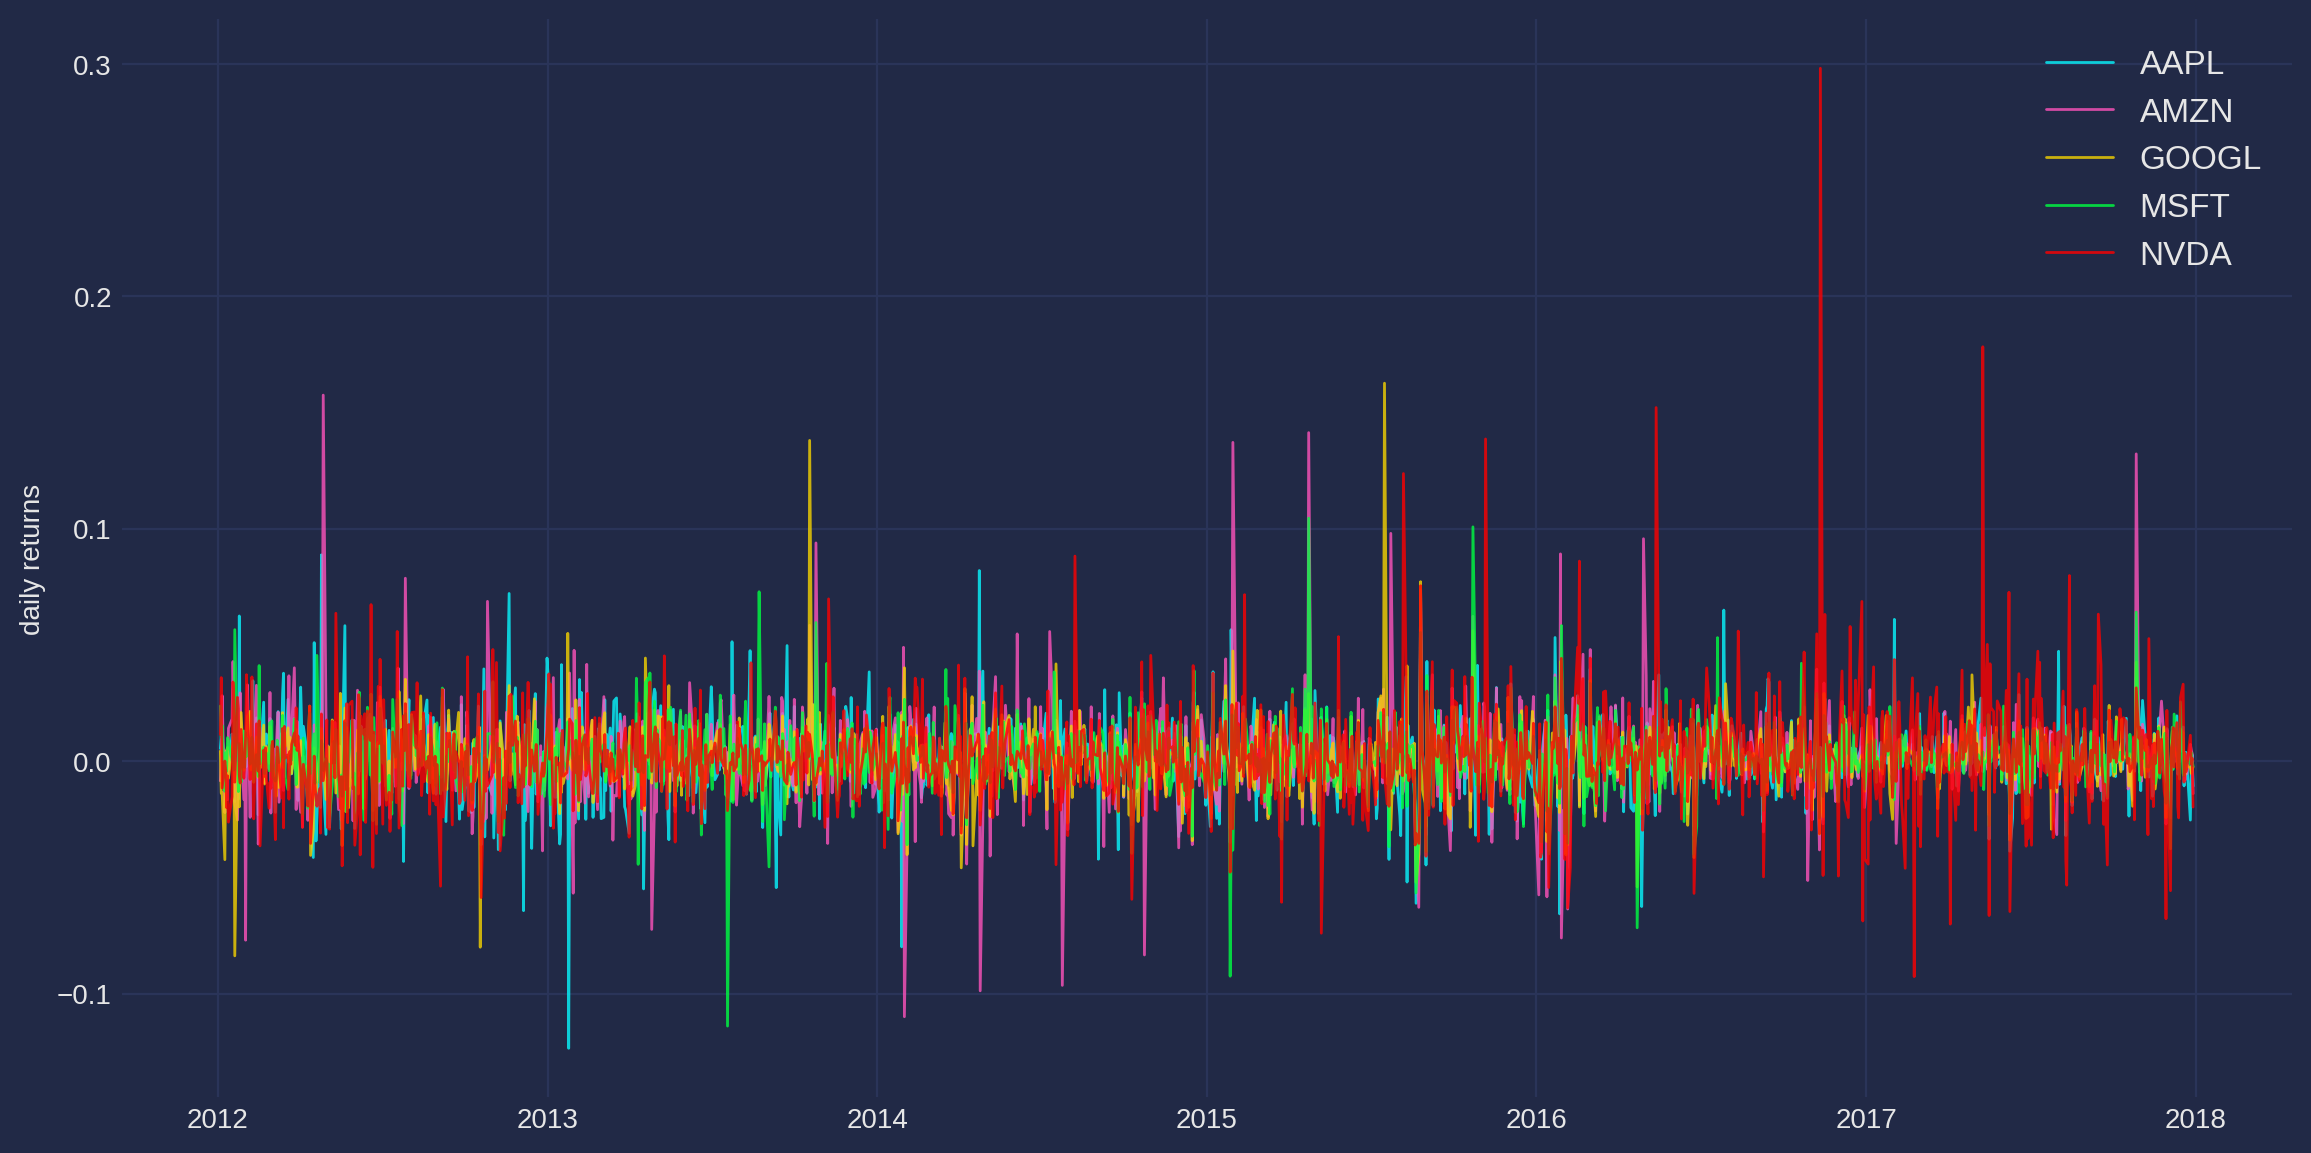

In [13]:
returns = table.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=1, alpha=0.8,label=c) # akciju ikdienas atdeve
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

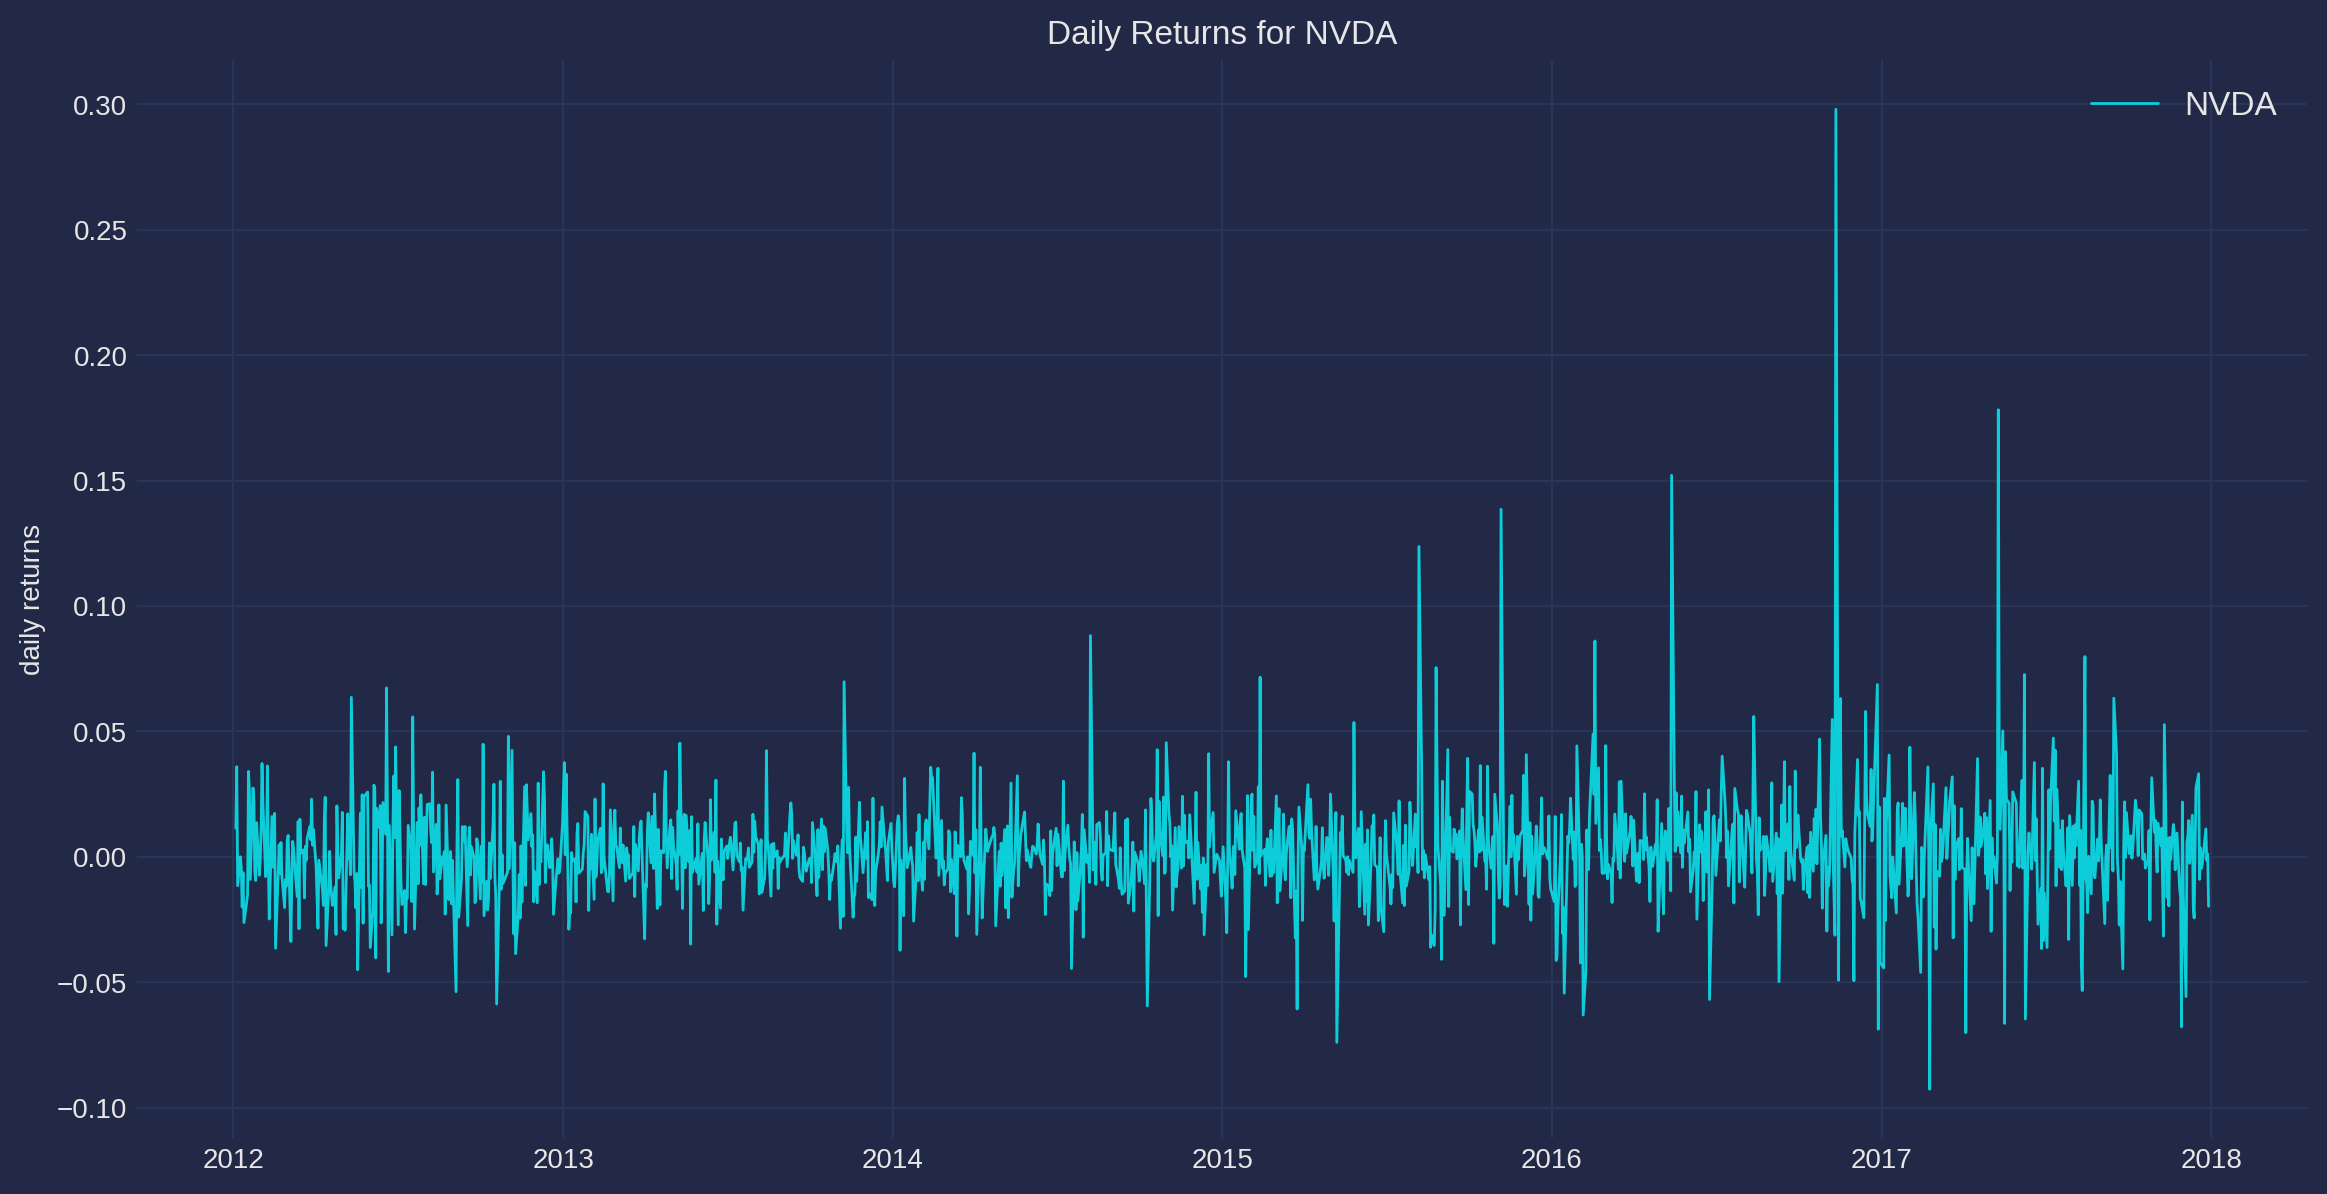

In [14]:
returns = table.pct_change()

plt.figure(figsize=(14, 7))

selected_ticker = 'NVDA' # apskatāmies vienas konkrētas akcijas performanci laika rāmī

if selected_ticker in returns.columns: # ciklā pārbaudam vai attiecīgā informācija vispār ir datu rāmī
    plt.plot(returns.index, returns[selected_ticker], lw=1, alpha=0.8, label=selected_ticker)
    plt.legend(loc='upper right', fontsize=12)
    plt.ylabel('daily returns')
    plt.title(f'Daily Returns for {selected_ticker}')
    plt.show()
else:
    print(f"The selected ticker '{selected_ticker}' is not present in the DataFrame.")


In [15]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

portfolio_annualised_performance - Funkcija kas aprēķina gada portfeļa veiktspēju, pamatojoties uz svariem, vidējo atdevi un kovariācijas matricu. Šī funkcija aprēķina gan portfeļa gada atdevi, gan gada standartnovirzi.

weights: katram portfeļa aktīvam piešķirtie svari.
mean_returns: katra aktīva vidējā atdeve.
cov_matrix: aktīvu atdeves kovariācijas matrica.


**MONTE CARLO** metode portfeļu randomizācijai

In [16]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

random_portfolios ģenerē nejaušus portfeļus un aprēķina to standarta novirzi, atdevi un Sharpe koeficientu. Šī funkcija katra portfeļa aktīviem izmanto nejaušus svarus.

Tas inicializē masīvu (results), lai saglabātu standarta novirzi, atdevi un Sharpe koeficientu katram nejauši ģenerētam portfelim.
Tas atkārtojas noteiktā portfeļu skaitā (num_portfolios).
Katram portfelim tas ģenerē nejaušus aktīvu svarus un normalizē tos, summējot līdz 1.
Tas aprēķina portfeļa standarta novirzi, ienesīgumu un Šarpa koeficientu, izmantojot portfeļa_annualised_performance funkciju.
Tas saglabā aprēķinātās vērtības (results) masīvā.
Tas atgriež (results) masīvu kopā ar katra portfeļa svara ierakstu sarakstu.

In [28]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000  # norādām portfeļu daudzumu
risk_free_rate = 0.0178 # norādām bezriska likmi

In [18]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

neg_sharp ratio aprēķina negatīvo Šarpa likmi
max sharp ratio izmanto skaitliskas optimizācijas metodi, lai atrastu portfeļa svarus, kas maksimāli palielina Šarpa koeficientu.

In [19]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

portfolio_volatility, aprēķina portfeļa svārstīgumu (atdeves standarta novirze). min_variance, izmanto skaitliskas optimizācijas metodi, lai atrastu portfeļa svarus, kas samazina portfeļa nepastāvību.

In [20]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [35]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252

    print ("-"*80)
    print ("Maksimālais Sharpe koeficienta portfeļa sadalījums\n")
    print ("Gada atdeve:", round(rp,2))
    print ("Gada svārstīgums:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimālā svārstīguma portfeļa sadalījums\n")
    print ("Gada atdeve:", round(rp_min,2))
    print ("Gada svārstīgums:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Atsevišķu akciju atdeve un svārstīgums\n")
    for i, txt in enumerate(table.columns):
        print (txt,":","Gada atdeve",round(an_rt[i],2),", Gada svārstīgums:",round(an_vol[i],2))
    print ("-"*80)

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=100)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='o',color='y',s=100, label='Maximālais Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='o',color='g',s=100, label='Minimālais svārstīgumsy')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-', color='red', label='efektīvā robeža')
    # ax.set_xlim(left=min(an_vol), right=max(an_vol) + 2) # ja vaig pamainīt X ass izmēru + ...
    ax.set_title('Marowitz 1 portfeļa optimizācija ar atsevišķām akcijām')
    ax.set_xlabel('Gada svārstīgums')
    ax.set_ylabel('Gada atdeve')
    ax.legend(labelspacing=0.8)

display_ef_with_selected - Funkcija kura parāda informāciju par maksimālo Sharpe koeficienta portfeļa sadalījumu, minimālo svārstīguma portfeļa sadalījumu un atsevišķu akciju atdevi un nepastāvību. Turklāt funkcija ģenerē izkliedes diagrammu, kas parāda atsevišķu akciju atdevi un svārstīgumu, maksimālo Šarpa koeficienta portfeli, minimālo nepastāvības portfeli un efektīvo robežu.

Aprēķina maksimālo Šarpa koeficienta portfeli, izmantojot funkciju max_sharpe_ratio.
Aprēķina minimālo nepastāvības portfeli, izmantojot funkciju min_variance.
Aprēķina gada atdevi un svārstīgumu maksimālās Šarpa koeficienta un minimālās svārstīguma portfeļiem.
Drukā aktīvu sadalījumu abos portfeļos.
Drukā atsevišķu akciju atdevi un nepastāvību.
Uzzīmē izkliedes diagrammu ar atsevišķām akcijām un izceļ maksimālo Šarpa koeficienta portfeli, minimālo nepastāvības portfeli un efektīvo robežu.


Vēl labāks variants portfeļu optimizācijas problēmām: https://github.com/metalcorebear/Markowitzify/blob/main/Portfolio%20Optimization.ipynb

--------------------------------------------------------------------------------
Maksimālais Sharpe koeficienta portfeļa sadalījums

Gada atdeve: 0.38
Gada svārstīgums: 0.21


             AAPL   AMZN  GOOGL   MSFT  NVDA
allocation  13.53  30.06   0.61  16.81  39.0
--------------------------------------------------------------------------------
Minimālā svārstīguma portfeļa sadalījums

Gada atdeve: 0.25
Gada svārstīgums: 0.17


             AAPL  AMZN  GOOGL   MSFT  NVDA
allocation  25.51  6.47  30.67  31.81  5.55
--------------------------------------------------------------------------------
Atsevišķu akciju atdeve un svārstīgums

AAPL : Gada atdeve 0.23 , Gada svārstīgums: 0.25
AMZN : Gada atdeve 0.36 , Gada svārstīgums: 0.3
GOOGL : Gada atdeve 0.22 , Gada svārstīgums: 0.22
MSFT : Gada atdeve 0.25 , Gada svārstīgums: 0.22
NVDA : Gada atdeve 0.51 , Gada svārstīgums: 0.35
--------------------------------------------------------------------------------


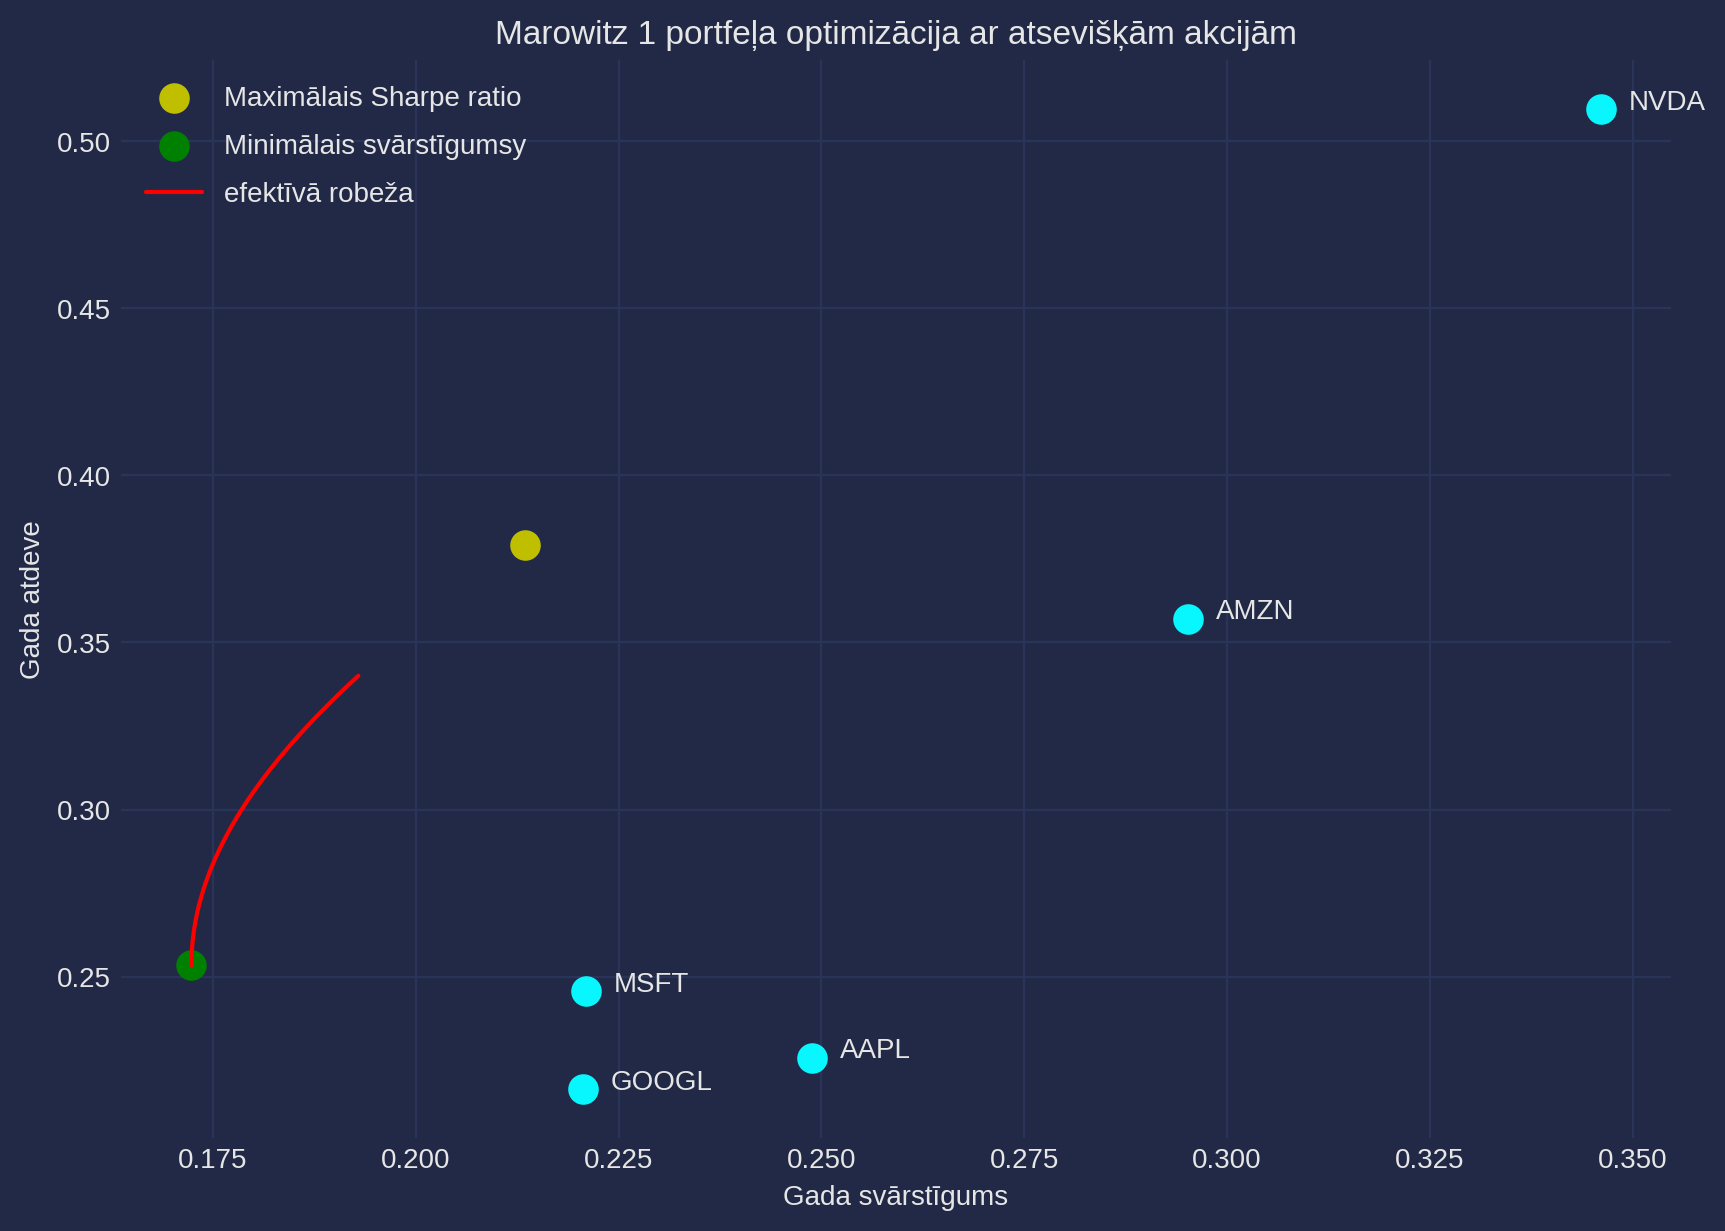

In [36]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)